### Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import KNNImputer #Impute values based on highly correlated features
from sklearn.impute import SimpleImputer #For imputing with median/mean

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Exploring Train Dataset

In [5]:
# Functional Brain Imaging Data
data_tfcm = pd.read_csv("TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
data_tfcm.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [6]:
# Checking for Null Values
null_counts = data_tfcm.isnull().sum()
null_counts = null_counts[null_counts>0]
print(null_counts)

Series([], dtype: int64)


- There are no NULL values in the MRI scan data

In [9]:
# Quantitative Data
data_quant = pd.read_excel("TEST/TEST_QUANTITATIVE_METADATA.xlsx",sheet_name="Sheet1")
data_quant.sample(n=5)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
139,duMJcIFRvvUn,73.37,14.0,3.0,17.0,37.0,15.0,15.0,23.0,3.0,11.0,0.0,10.0,2.0,7.0,1.0,1.0,7.0,8.841775
100,x0tFPjGEtTDo,60.03,14.0,3.0,13.0,47.0,15.0,14.0,29.0,3.0,13.0,2.0,11.0,4.0,8.0,2.0,0.0,10.0,7.519393
160,0ImS6uhE3Ie9,96.72,14.0,3.0,14.0,34.0,11.0,20.0,22.0,1.0,4.0,1.0,2.0,3.0,1.0,2.0,1.0,10.0,15.270134
122,mca5wy8JcazG,60.03,14.0,3.0,10.0,40.0,12.0,12.0,21.0,3.0,16.0,3.0,10.0,5.0,7.0,6.0,3.0,5.0,8.803216
103,jZz3FS9Lxw7Y,100.05,14.0,3.0,17.0,32.0,18.0,14.0,21.0,5.0,10.0,1.0,9.0,5.0,4.0,1.0,0.0,7.0,13.466005


In [10]:
# Size
data_quant.shape

(304, 19)

In [11]:
# Info
data_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              304 non-null    object 
 1   EHQ_EHQ_Total               303 non-null    float64
 2   ColorVision_CV_Score        295 non-null    float64
 3   APQ_P_APQ_P_CP              289 non-null    float64
 4   APQ_P_APQ_P_ID              289 non-null    float64
 5   APQ_P_APQ_P_INV             289 non-null    float64
 6   APQ_P_APQ_P_OPD             289 non-null    float64
 7   APQ_P_APQ_P_PM              289 non-null    float64
 8   APQ_P_APQ_P_PP              289 non-null    float64
 9   SDQ_SDQ_Conduct_Problems    274 non-null    float64
 10  SDQ_SDQ_Difficulties_Total  274 non-null    float64
 11  SDQ_SDQ_Emotional_Problems  274 non-null    float64
 12  SDQ_SDQ_Externalizing       274 non-null    float64
 13  SDQ_SDQ_Generating_Impact   274 non

<Axes: >

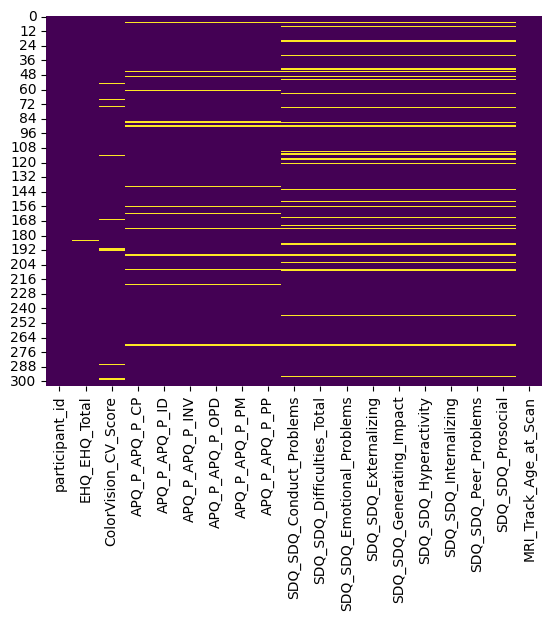

In [33]:
import seaborn as sns

sns.heatmap(data_quant.isnull(), cbar=False, cmap='viridis')

In [12]:
# Count rows where all columns have NaN values
num_all_null_rows = data_quant.isnull().all(axis=1).sum()

print(f"Number of rows with all null values: {num_all_null_rows}")

Number of rows with all null values: 0


<b> Univariate Analysis </b>

In [14]:
# Descriptive Analysis
data_quant.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,303.000000,295.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,304.000000
mean,59.144488,13.240678,3.321799,13.259516,39.633218,16.726644,15.944637,24.826990,1.890511,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,11.206715
std,49.330962,1.986273,0.810248,3.627411,5.153586,3.360000,4.931163,3.283666,1.973000,6.056771,2.139131,4.122804,2.687768,2.821016,3.421676,1.997314,2.084717,3.406516
min,-100.050000,0.000000,2.000000,6.000000,20.000000,7.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.007871
25%,50.060000,13.000000,3.000000,11.000000,36.000000,14.000000,12.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,1.000000,0.000000,6.000000,8.558207
50%,73.370000,14.000000,3.000000,13.000000,40.000000,17.000000,15.000000,25.000000,1.000000,11.000000,2.000000,7.000000,4.000000,6.000000,4.000000,1.000000,8.000000,10.246749
75%,93.380000,14.000000,3.000000,16.000000,43.000000,19.000000,19.000000,28.000000,3.000000,16.000000,4.000000,10.750000,6.000000,8.000000,7.000000,3.000000,10.000000,13.406741
max,100.050000,14.000000,8.000000,23.000000,50.000000,27.000000,31.000000,30.000000,10.000000,29.000000,10.000000,18.000000,10.000000,10.000000,15.000000,9.000000,10.000000,21.561943


<Axes: xlabel='EHQ_EHQ_Total', ylabel='Count'>

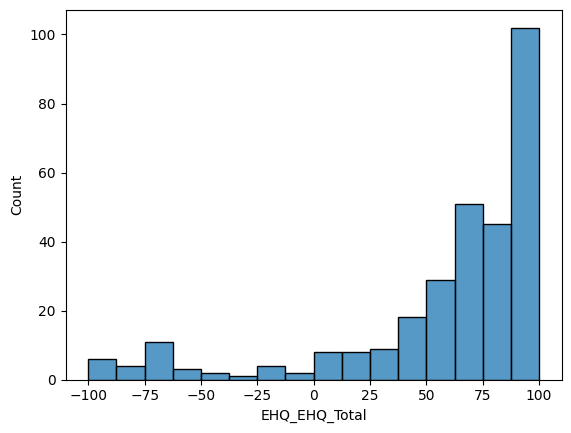

In [15]:
# Distribution of EHQ_EHQ
sns.histplot(data_quant['EHQ_EHQ_Total'])

<font color='red'> <b> Edinburgh Handedness Questionnaire:</b> Edinburgh Handedness Inventory is a measurement scale used to assess the dominance of a person's right or left hand in everyday activities. The inventory can be used by an observer assessing the person, or by a person self-reporting hand use.

- -100 = 10th left
- 
−28 ≤ LI < 48 = middle
- 
100 = 10th right
</font>

<Axes: xlabel='ColorVision_CV_Score', ylabel='Count'>

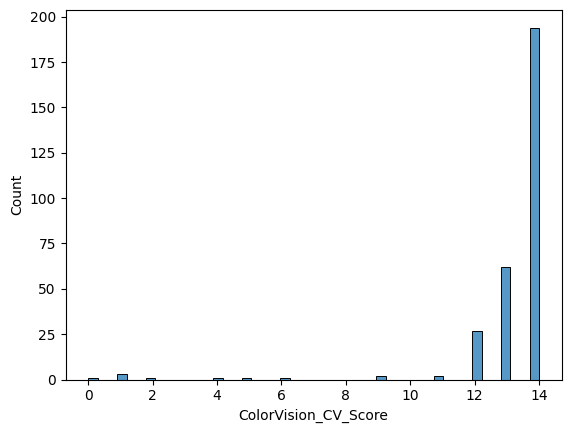

In [16]:
# Distribution of Colorvision Score
sns.histplot(data_quant['ColorVision_CV_Score'])

<font color='red'> <b>Red-green color vision defect (Red-Green Color Blindness)</b> is a type of color vision deficiency where a person has difficulty distinguishing between red and green hues. It is the most common form of color blindness and is usually inherited through the X chromosome, making it <b> more common in males than females </b>

Interpreting Scores:
- 0-2 → Likely severe red-green color blindness.
- 3-5 → Mild to moderate color blindness.
- 6+ → Likely normal color vision.
</font>

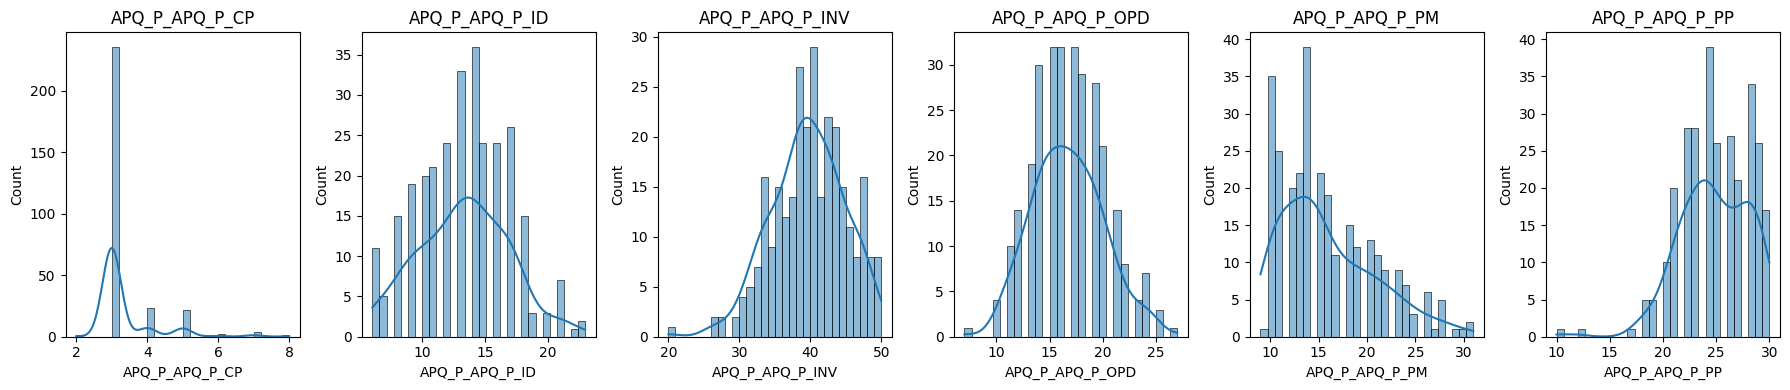

In [17]:
# Distribution of APQ Plots
features = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

fig, axes = plt.subplots(1, 6, figsize=(18, 4)) 

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(data_quant[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout() 
plt.show()

<font color='red'> <b> Alabama Parenting Questionnaire - Parent Report </b></font>
- APQ_P_APQ_P_CP	Corporal Punishment Score
- 
APQ_P_APQ_P_ID	Inconsistent Discipline Score
- 
APQ_P_APQ_P_INV	Involvement Scor
- e
APQ_P_APQ_P_OPD	Other Discipline Practices Score (Not factored into total score but provides item level informatio
- n)
APQ_P_APQ_P_PM	Poor Monitoring/Supervision Sc
- ore
APQ_P_APQ_P_PP	Positive Parenting core


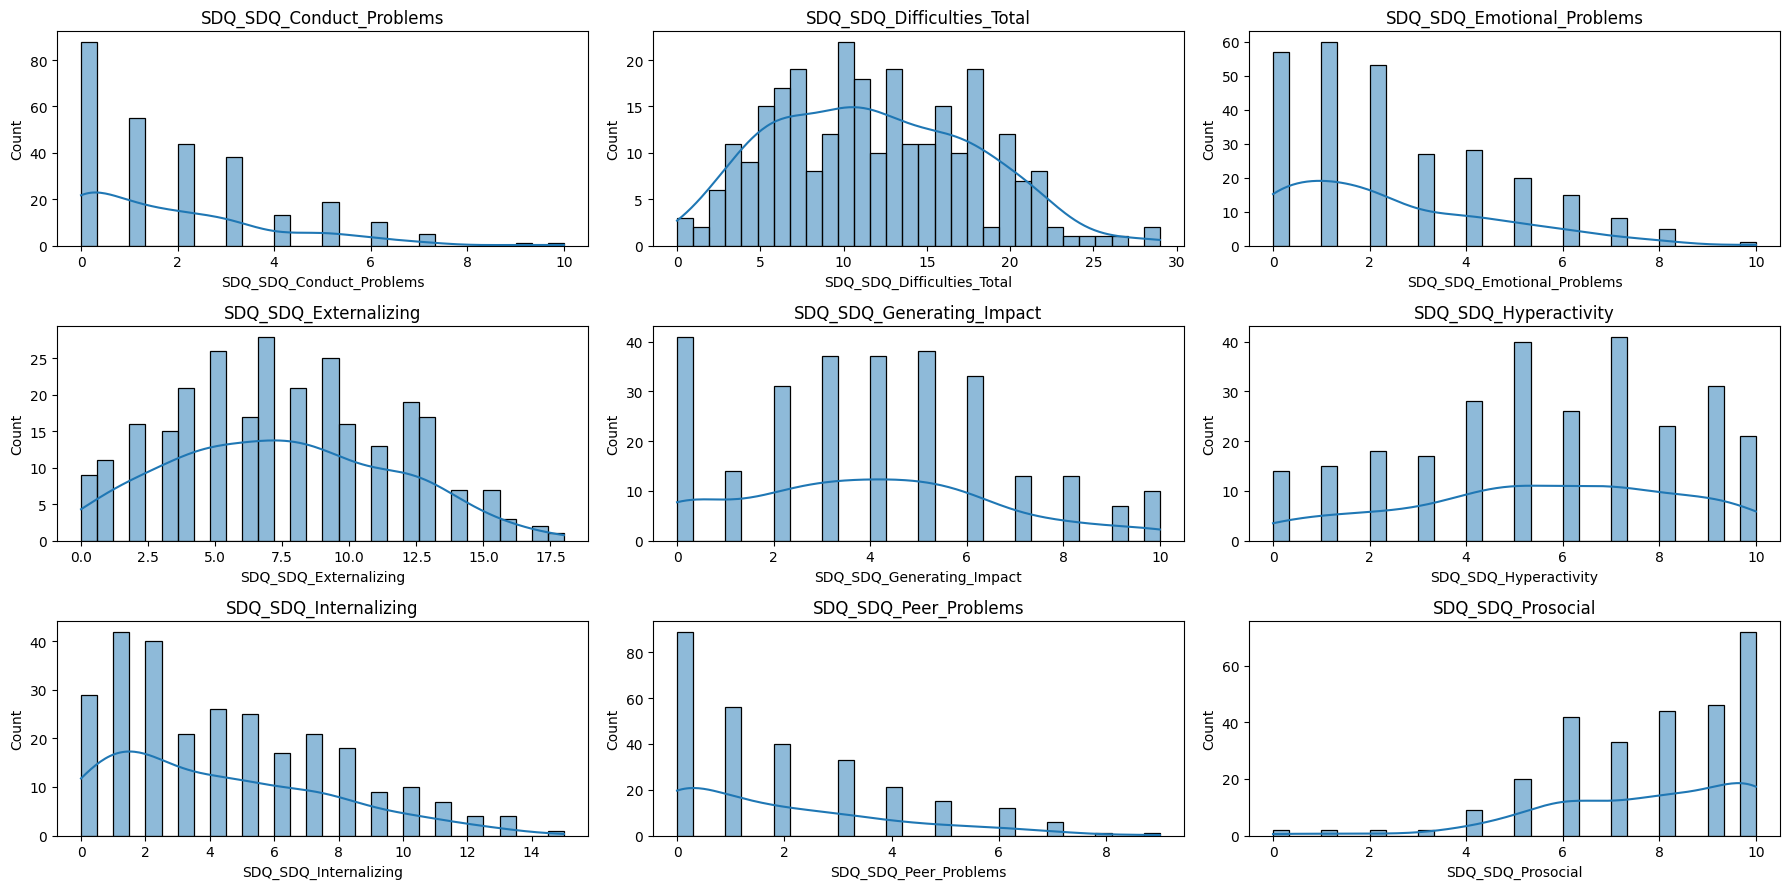

In [18]:
# Distribution of SDQ Plots
features = ['SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity','SDQ_SDQ_Internalizing','SDQ_SDQ_Peer_Problems','SDQ_SDQ_Prosocial']

fig, axes = plt.subplots(3, 3, figsize=(18, 9)) 

# Plot histograms for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Convert index to row and column
    sns.histplot(data_quant[feature], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout() 
plt.show()

<font color='red'><b> Strength and Difficulties Questionnaire</b></font>

- SDQ_SDQ_Conduct_Problems: Conduct problems scale
- 
SDQ_SDQ_Difficulties_Tota: 	Total Difficulties Score
- 
SDQ_SDQ_Emotional_Proble: s	Emotional Problems Scal
- e
SDQ_SDQ_Externaliz: ng	Externalizing Sco
- re
SDQ_SDQ_Generating_Im: act	Generating Impact Sco
- res
SDQ_SDQ_Hyperact: vity	Hyperactivity S
- cale
SDQ_SDQ_Interna: izing	Internalizing 
- Score
SDQ_SDQ_Peer_P: oblems	Peer Problems
-  Scale
SDQ_SDQ_P: osocial	Prosoci Scale



<Axes: xlabel='MRI_Track_Age_at_Scan', ylabel='Count'>

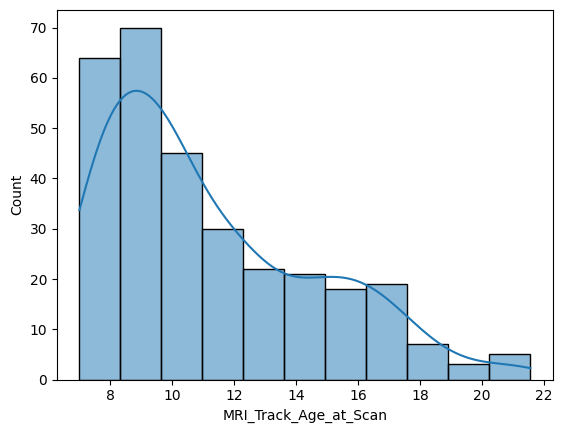

In [19]:
# Distribution of Age
sns.histplot(data_quant['MRI_Track_Age_at_Scan'], kde=True)

In [20]:
data_quant[data_quant['MRI_Track_Age_at_Scan'] == 0].size

0

In [21]:
# Coefficient of Variation
np.std(data_quant['MRI_Track_Age_at_Scan'])/np.mean(data_quant['MRI_Track_Age_at_Scan'])*100

30.347060901234236

<font color='red'> <b> How to Interpret CV? </b> </font>

Lower CV (e.g., < 10%) → Data is less dispersed (more consistent, low variability).

Higher CV (e.g., > 30%) → Data has high variability (more spread out, less consistent).

CV > 1 (or 100%) → High dispersion; the standard deviation is greater than the mean.

- High variability in data
- We cannot impute the data with mean as the data has a high standard deviation and is not normally distributed 

In [23]:
# Target variables
data_cm = pd.read_excel("TEST/TEST_CATEGORICAL.xlsx",sheet_name="Sheet1")
data_cm.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [24]:
# Check for null values
data_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


In [25]:
# Mode Values of all the features
data_cm.drop(columns='participant_id').mode().iloc[0]

Basic_Demos_Enroll_Year             2022.0
Basic_Demos_Study_Site                 4.0
PreInt_Demos_Fam_Child_Ethnicity       0.0
PreInt_Demos_Fam_Child_Race            0.0
MRI_Track_Scan_Location                4.0
Barratt_Barratt_P1_Edu                21.0
Barratt_Barratt_P1_Occ                45.0
Barratt_Barratt_P2_Edu                21.0
Barratt_Barratt_P2_Occ                45.0
Name: 0, dtype: float64

In [27]:
# Descriptive on CM
data_cm.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


<b> Multivariate Analysis </b>

In [29]:
# Merge Quant & CM datasets
data_quant_cm = pd.merge(data_quant, data_cm, on='participant_id', how='outer')
data_quant_cm.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,...,8.992813,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,...,12.324093,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,...,7.770933,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,...,9.304814,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,...,8.261350,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [30]:
data_quant_cm.shape

(304, 28)

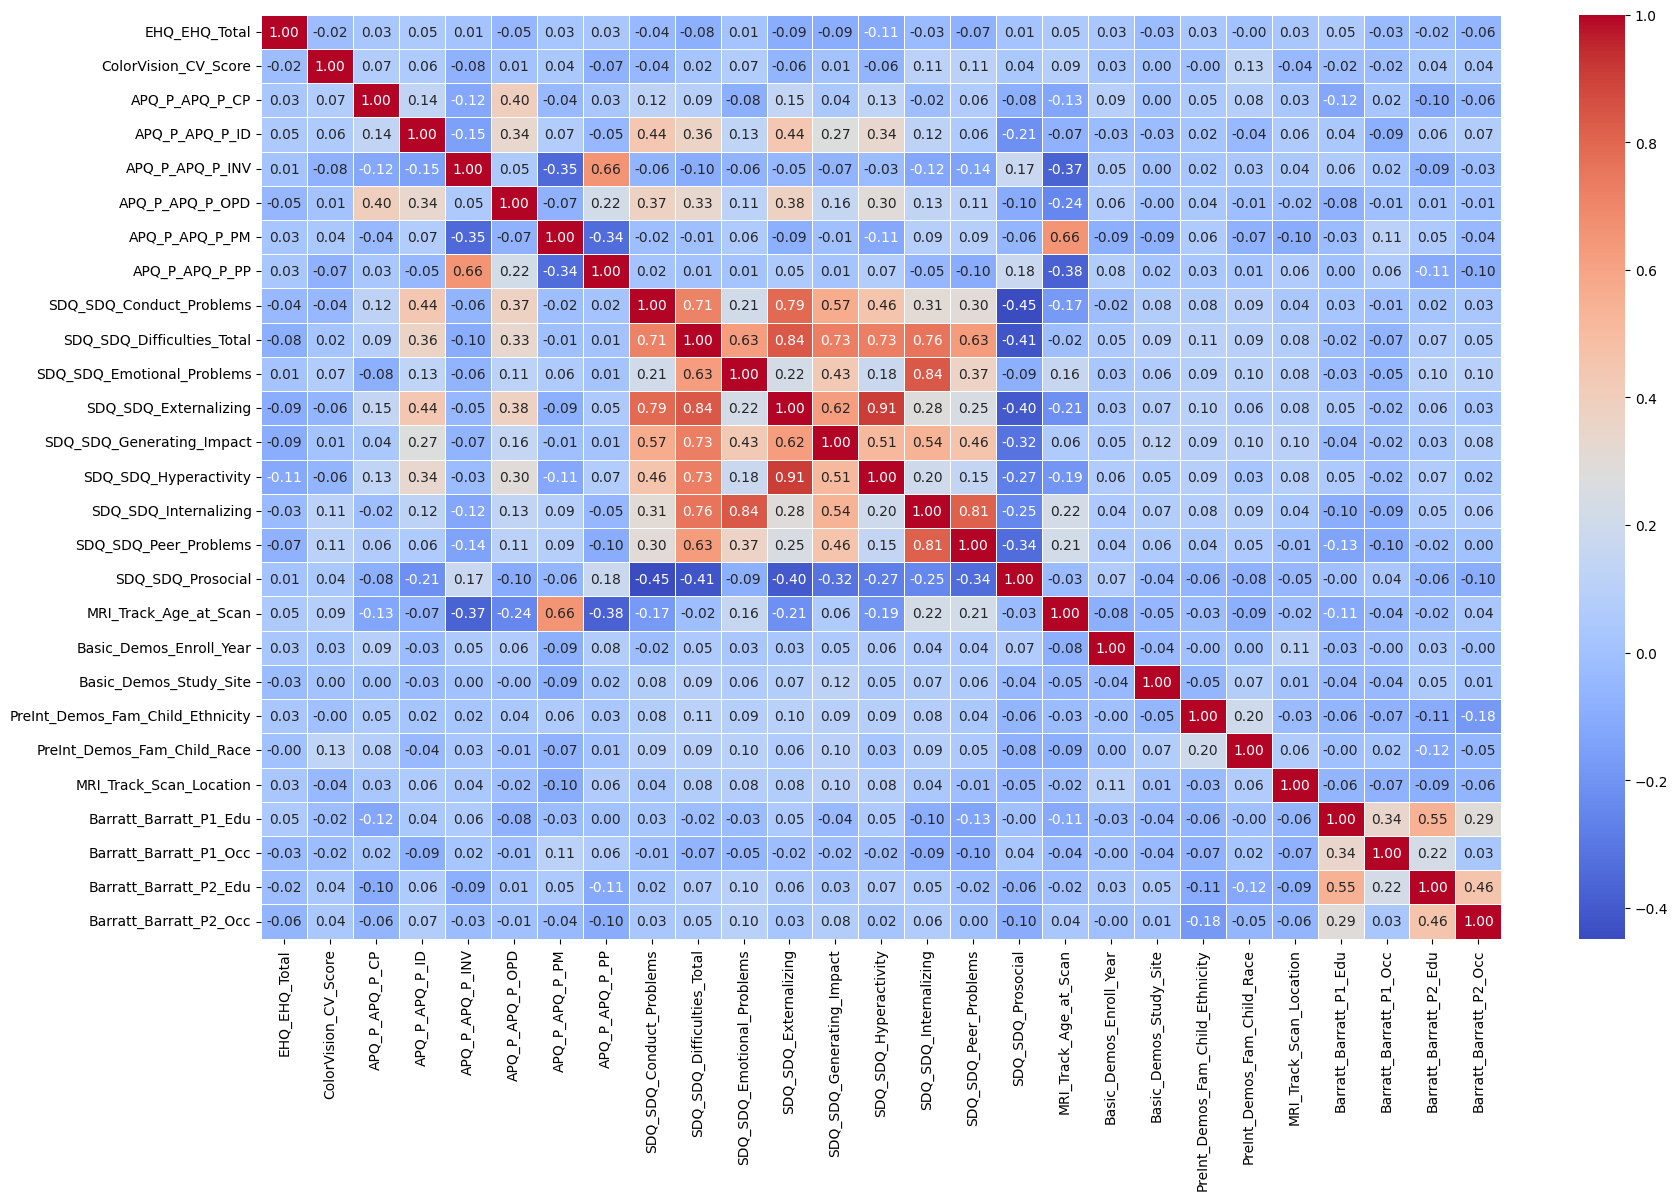

In [32]:
# Pairwise Correlation
corr_matrix = data_quant_cm.drop(columns='participant_id').corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

<b> Combining all the datasets to create a final test dataset </b>

In [35]:
data_all = pd.merge(data_tfcm, data_quant_cm, on='participant_id', how='outer')
data_all.shape

(304, 19928)

In [38]:
missing_count_df = pd.DataFrame(null_counts)
missing_count_df.rename(columns={0:'Count'}, inplace=True)

In [39]:
missing_count_df['Percentage'] = (missing_count_df['Count']/data_all.shape[0])*100
missing_count_df

,Count,Percentage
Barratt_Barratt_P2_Occ,42,13.815789
Barratt_Barratt_P2_Edu,36,11.842105
SDQ_SDQ_Emotional_Problems,30,9.868421
SDQ_SDQ_Prosocial,30,9.868421
SDQ_SDQ_Peer_Problems,30,9.868421
SDQ_SDQ_Internalizing,30,9.868421
SDQ_SDQ_Hyperactivity,30,9.868421
SDQ_SDQ_Generating_Impact,30,9.868421
SDQ_SDQ_Externalizing,30,9.868421
SDQ_SDQ_Difficulties_Total,30,9.868421


In [40]:
data_all.to_csv("Test_Data_Combined.csv", index=False)